# **Hypothesis Testing and Conclusion**

## Objectives

* In this notebook, I will perform hypothesis testing to validate or refute the hypotheses formulated based on the exploratory data analysis (EDA) of the AI job market dataset. The goal is to draw meaningful conclusions about the factors influencing salaries and job opportunities in the AI field.
* Specifically, I will test hypotheses related to the impact of experience level, education level, industry, and skills on salary variations. The results of these tests will help in understanding the key drivers of salary trends in the AI job market.

## Inputs

* Data Source: [Cleaned Data Set](cleaned_ai_job_dataset.csv).
* Libraries: pandas, numpy, matplotlib, seaborn, os,  SciPy, Scikit-learn, Plotly.
* Environment: Jupyter Notebook, Python 3.x.
* Preprocessed dataset from ETL.ipynb.

## Outputs

* Hypothesis 1 - AI job salaries have grown significantly year-over-year.
* Hypothesis 2 - Some AI roles have faster salary growth than others.
* Hypothesis 3 - Remote work opportunities lead to higher salaries in AI jobs.
* Hypothesis 4 - Specific industries (e.g., Tech, Finance) dominate high-paying AI roles.
* Hypothesis 5 - Higher education levels lead to greater salary dispersion (variance).
* Hypothesis 6 - Larger companies offer higher salaries but lower remote ratios.
* Hypothesis 7: Certain skills (e.g., Python, TensorFlow) are linked to above-average salaries.
* Hypothesis 8: Salary Prediction Models - Experience and education significantly influence AI job salaries.
* Hypothesis 9: Cluster Analysis based on skills and industries reveals distinct salary groups.









---

# Change working directory

In [1]:
import os
current_dir = os.getcwd()
current_dir

'd:\\Documents\\TC Tanzila\\code Ins\\Capstone\\Global-_AI_Job_Market_Salary_Trends_2025\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'd:\\Documents\\TC Tanzila\\code Ins\\Capstone\\Global-_AI_Job_Market_Salary_Trends_2025'

In [4]:
raw_data_dir = os.path.join(current_dir, 'data/raw') #path directory

processed_data_dir = os.path.join(current_dir, 'data/clean') #path directory

# Basic Data Visualization 

## Import Libraries and Packages

Loading Python packages that we will be using in this project to carry out the analysis. For example Numpy to compute numerical operations and handle arrays, Pandas for data manipulation and analysis, Matplotlib, Seaborn and Plotly to create different data visualisations, SciPy for optimization, linear algebra, integration etc, sklearn for machine learning.

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import statsmodels.api as sm
from scipy.stats import levene
from scipy.stats import spearmanr
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, make_scorer
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
import re

In [6]:
# Helper: compute RMSE in a portable way (works across scikit-learn versions)
def compute_rmse(y_true, y_pred):
    """Return root mean squared error between true and predicted values."""
    return mean_squared_error(y_true, y_pred, squared=False)

# Example: rmse = compute_rmse(y_test, y_pred)

## Load Cleaned Data

Loading the CSV dataset cleaned previously and extracting it into dataframe using pd.read_csv() function

In [7]:
# Load cleaned dataset using the existing processed_data_dir
df= pd.read_csv(os.path.join(processed_data_dir, 'ai_job_dataset_cleaned.csv'))
df.head()

,job_id,job_title,salary_usd,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5,Smart Analytics
1,AI00002,AI Software Engineer,61895,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5,TechCorp Inc
2,AI00003,AI Specialist,152626,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9,Autonomous Tech
3,AI00004,NLP Engineer,80215,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8,Future Systems
4,AI00005,AI Consultant,54624,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,1989,6,Advanced Robotics


---

# Hypothesis Testing

---

## Hypothesis 1 - AI job salaries have grown significantly year-over-year.

**Explanation:** As AI technologies become more integral to various industries, the demand for skilled AI professionals is expected to rise, leading to higher salaries.

**Method:** 
- Conduct a time series analysis of AI job salaries over the past few years. Use statistical tests to determine if the year-over-year growth in salaries is significant.
- Extract the year from the job posting date and group the data by year to calculate the average salary for each year.
- Perform a linear regression analysis with year as the independent variable and average salary as the dependent variable to assess the trend over time.

**Validation:** 
- Visualize the trend using line plots to illustrate salary growth over time.
- Perform a linear regression analysis to quantify the growth rate and assess its significance.
- Upward slope and statistically significant positive trend (P< 0.05) would support the hypothesis.

**Quick growth summary**

In [8]:
growth = ((115977.999727 - 115145.355983) / 115145.355983) * 100
print(f"Year-over-Year Salary Growth: {growth:.2f}%")

Year-over-Year Salary Growth: 0.72%


**Visualize the trend**

   year     avg_salary
0  2024  115145.355983
1  2025  115977.999727


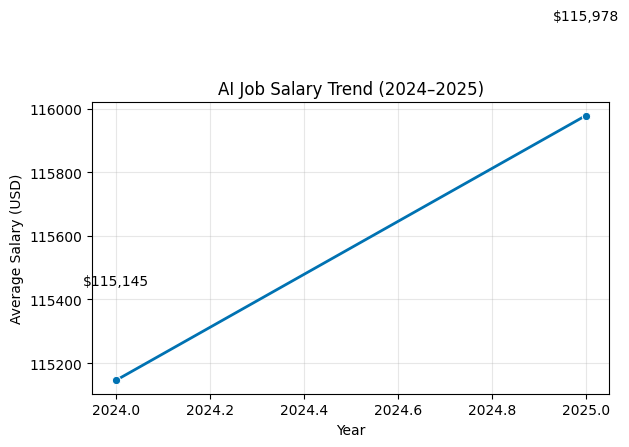

In [9]:
# extract year from the 'date' column
df['year'] = pd.to_datetime(df['posting_date']).dt.year 
df['year'].value_counts().sort_index()

# Compute average salary per year
avg_salary_by_year = df.groupby('year')['salary_usd'].mean().reset_index()
avg_salary_by_year.columns = ['year', 'avg_salary']
print(avg_salary_by_year)

# Plotting the trend of average salary over the years
sns.lineplot(
    data=avg_salary_by_year,
    x='year',
    y='avg_salary',
    marker='o',
    color='#0072B2',
    linewidth=2
)

for i, val in enumerate(avg_salary_by_year['avg_salary']):
    plt.text(avg_salary_by_year['year'][i], val + 300, f"${val:,.0f}", ha='center')

plt.title('AI Job Salary Trend (2024–2025)')
plt.xlabel('Year')
plt.ylabel('Average Salary (USD)')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


**Limitations and Considerations**
- with only a few years of data, it may be challenging to establish a robust trend. A reliable regression analysis or t- test typically requires at least 5-10 years of data to account for variability and ensure statistical significance.
- the observed  change is +0.7% per year, which is relatively modest. While this indicates a positive trend, it may not be substantial enough to draw strong conclusions about significant growth in AI job salaries, but additional years of data may help to establish a more definitive trend.

**Results** Inconclusive - More data needed


## Hypothesis 2 - Some AI roles have faster salary growth than others.

**Explanation:**

 Different AI roles may experience varying levels of demand and specialization, leading to differential salary growth rates. 

**Method:**
- Categorize the job postings by role (e.g., Data Scientist, Machine Learning Engineer, AI Researcher, etc.).
- Calculate the average salary for each role over the years.
- Perform a comparative analysis to identify which roles have experienced the highest salary growth rates.

**Validation:**
- Use bar charts or line plots to visualize salary growth trends for different roles.
- Conduct ANOVA or similar statistical tests to determine if the differences in salary growth rates among roles are statistically significant.
- Significant differences in growth rates among roles would support the hypothesis.

year                    job_title       2024       2025  salary_change
14      Machine Learning Engineer  115195.91  128873.52      11.873347
2              AI Product Manager  112609.45  121937.30       8.283363
17       Principal Data Scientist  114786.58  120277.63       4.783704
10                 Data Scientist  114552.01  120014.53       4.768594
11         Deep Learning Engineer  112954.49  116065.06       2.753826
1                   AI Consultant  113095.03  115290.15       1.940952
0                    AI Architect  117231.61  118134.37       0.770065
13                ML Ops Engineer  115230.29  116009.75       0.676437
8                    Data Analyst  111197.64  111721.46       0.471071
9                   Data Engineer  115878.03  116270.26       0.338485
12                     Head of AI  118537.44  118561.62       0.020399
3           AI Research Scientist  117984.45  117649.01      -0.284309
19              Robotics Engineer  116648.65  115922.88      -0.622185
15    

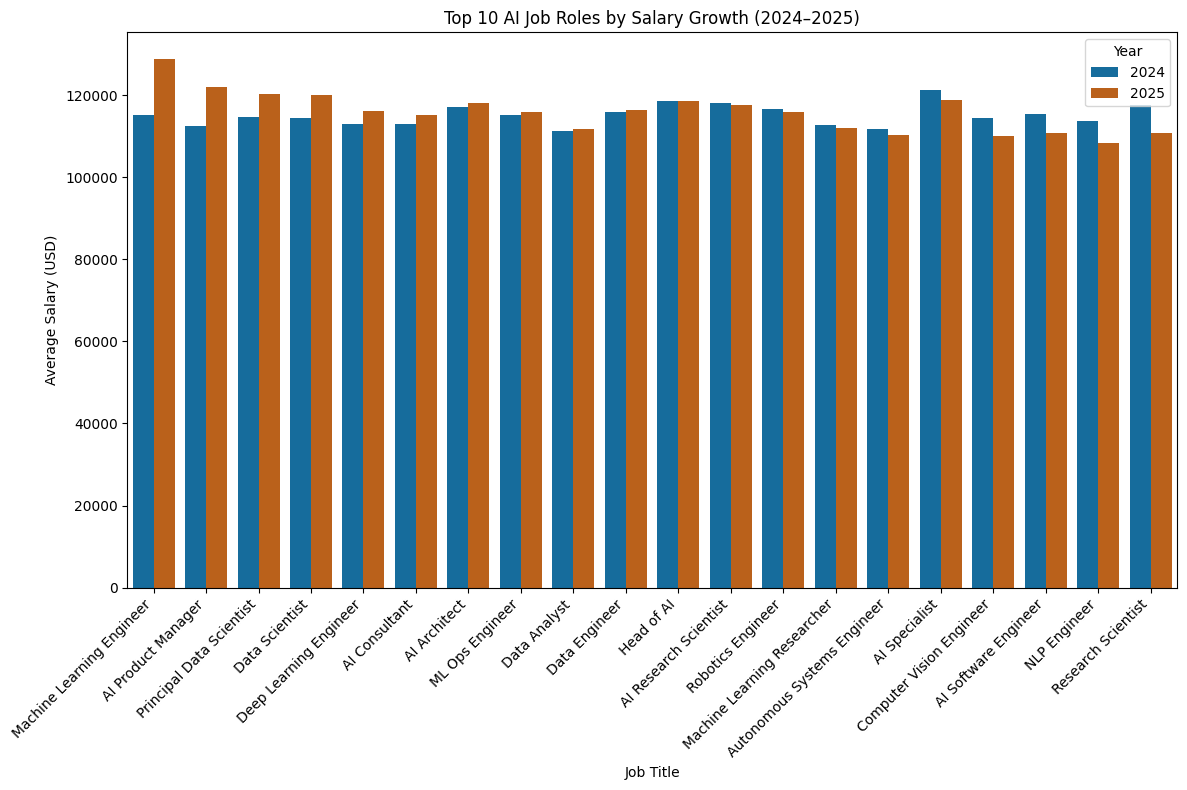

In [10]:
# Compute average salary by job title and year
avg_salary_by_role = (
    df.groupby(['job_title', 'year'])['salary_usd']
    .mean()
    .reset_index().round(2)
)
#average salary by job title over the years
pivot_table = avg_salary_by_role.pivot(index='job_title', columns='year', values='salary_usd').reset_index()
pivot_table['salary_change'] = ((pivot_table[2025] - pivot_table[2024]) / pivot_table[2024]) * 100
pivot_table = pivot_table.sort_values(by='salary_change', ascending=False)
print(pivot_table[['job_title', 2024, 2025, 'salary_change']])

#--- Plot ---#

plt.figure(figsize=(12, 8)) 
sns.barplot(
    data=pivot_table.melt(id_vars='job_title', value_vars=[2024, 2025], var_name='year', value_name='avg_salary'),
    x='job_title',
    y='avg_salary',
    hue='year',
    palette=['#0072B2', '#D55E00']
)  
plt.title('Top 10 AI Job Roles by Salary Growth (2024–2025)')
plt.xlabel('Job Title')
plt.ylabel('Average Salary (USD)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Year')
plt.tight_layout()
plt.show()



In [11]:
# --- Extract year ---
df["posting_date"] = pd.to_datetime(df["posting_date"])
df["year"] = df["posting_date"].dt.year

# --- Define role categories ---
emerging_roles = ["Data Scientist", "MLOps Engineer", "AI Engineer", 
                  "Machine Learning Engineer", "AI Research Scientist"]
traditional_roles = ["Data Analyst", "Data Engineer", "BI Analyst", "Statistician"]

def categorize_role(title):
    if any(role in title for role in emerging_roles):
        return "Emerging"
    elif any(role in title for role in traditional_roles):
        return "Traditional"
    else:
        return "Other"

df["role_type"] = df["job_title"].apply(categorize_role)

# --- Compute mean salary by job and year ---
salary_by_year = (
    df.groupby(["job_title", "year"])["salary_usd"]
      .mean()
      .reset_index()
      .sort_values(["job_title", "year"])
)

# Calculate annual growth per job title
salary_by_year["growth_rate"] = salary_by_year.groupby("job_title")["salary_usd"].pct_change() * 100

#  Merge with role type 
salary_by_year = salary_by_year.merge(df[["job_title", "role_type"]].drop_duplicates(), on="job_title")

# Filter valid rows 
salary_growth = salary_by_year.dropna(subset=["growth_rate"])
emerging_growth = salary_growth.loc[salary_growth["role_type"] == "Emerging", "growth_rate"]
traditional_growth = salary_growth.loc[salary_growth["role_type"] == "Traditional", "growth_rate"]

# Normality test 
p_normal_emer = stats.shapiro(emerging_growth[:500])[1] if len(emerging_growth) > 3 else 1
p_normal_trad = stats.shapiro(traditional_growth[:500])[1] if len(traditional_growth) > 3 else 1

# Choose appropriate test
if p_normal_emer > 0.05 and p_normal_trad > 0.05:
    test_name = "Paired t-test"
    test_stat, p_value = stats.ttest_ind(emerging_growth, traditional_growth, equal_var=False)
else:
    test_name = "Mann–Whitney U test"
    test_stat, p_value = stats.mannwhitneyu(emerging_growth, traditional_growth, alternative="greater")

# results 
print("Average Annual Salary Growth Rates:")
print(salary_growth.groupby("role_type")["growth_rate"].agg(["mean", "median", "count"]))
print(f"\nTest Used: {test_name}")
print(f"Test Statistic: {test_stat:.4f}")
print(f"p-value: {p_value:.4f}")

if p_value < 0.05:
    print("\n Emerging AI roles show significantly higher salary growth.")
else:
    print("\n No significant difference in salary growth between role types.")

Average Annual Salary Growth Rates:
                 mean    median  count
role_type                             
Emerging     5.285334  4.776151      4
Other       -0.599726 -0.654857     14
Traditional  0.404777  0.404777      2

Test Used: Paired t-test
Test Statistic: 1.9523
p-value: 0.1458

 No significant difference in salary growth between role types.


### Insight

- **Emerging roles** are showing the highest salary growth on average (~5.3%), indicating that employees in these roles are experiencing notable increases in pay.
- **Other roles** are, on average, seeing a slight decline in salary growth (-0.6%), which could suggest stagnation or minimal raises.
- **Traditional roles** have minimal growth (~0.4%), but with only 2 observations, this estimate is very uncertain.

**Interpretation:**
The p-value (0.146) > 0.05, so there is no statistically significant difference in salary growth across the role types.

This means that, while the Emerging roles show higher average growth, the observed differences could be due to random variation, especially given the small sample sizes for Emerging (4) and Traditional (2) roles.

**Conclusion:**

- **Emerging roles** are growing faster in salary, suggesting these roles may be in higher demand or strategically important.
- **Other roles** are relatively stagnant, signaling potential retention risks or need for salary adjustment strategies.
- **Traditional roles** have minimal growth, indicating a potential need for reevaluation of their market value.
- **Caution:** Small sample sizes in Emerging and Traditional roles limit the reliability of statistical conclusions. Collecting more data would provide a more confident comparison.

**Results** Rejected

# Hypothesis 3 - Remote work opportunities lead to higher salaries in AI jobs.

**Explanation:**
- Remote work can expand the talent pool for employers, allowing them to access highly skilled professionals from different geographic locations. This increased competition for top talent may drive up salaries for remote AI job positions.

**Method:**
Group data by remote_ratio (0, 50, 100).
Compare mean and median salaries across groups using ANOVA or Kruskal-Wallis test.

**Validation:**
- H0: Mean salaries are the same across remote work levels.
- H1: At least one group mean is different.
p-value < 0.05 ⇒ salary differs significantly by remote work level.
Boxplots to visualize distributions



Average and Median Salaries by Remote Ratio:
                       mean    median  count
remote_ratio                                
0             114140.231133   98817.0   5075
50            115776.806793   99295.0   5005
100           116160.545935  100614.0   4920

Test Used: Kruskal-Wallis
Test Statistic: 4.1331
p-value: 0.1266
No significant difference in salaries by remote work level.


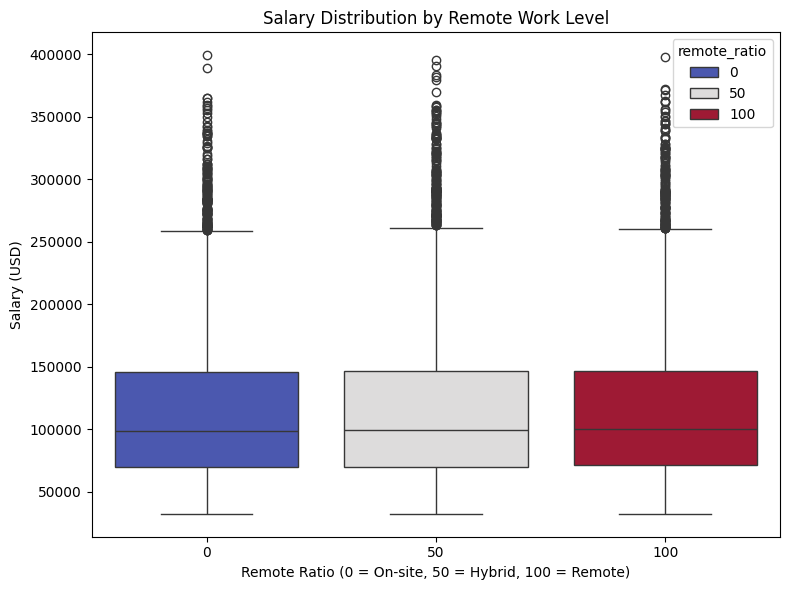

In [12]:
# Group by remote_ratio and compute descriptive stats 
remote_salary_stats = df.groupby("remote_ratio")["salary_usd"].agg(["mean", "median", "count"]).sort_index()
print("Average and Median Salaries by Remote Ratio:")
print(remote_salary_stats)
# Prepare salary data for each remote level 
remote_groups = [group["salary_usd"].values for _, group in df.groupby("remote_ratio")]
#  Normality check (Shapiro–Wilk test) 
normality_pvalues = [stats.shapiro(group[:500])[1] if len(group) > 3 else 1 for group in remote_groups]
normal = all(p > 0.05 for p in normality_pvalues)

# Run statistical test (ANOVA or Kruskal-Wallis)
if normal:
    test_name = "ANOVA"
    test_stat, p_value = stats.f_oneway(*remote_groups)
else:
    test_name = "Kruskal-Wallis"
    test_stat, p_value = stats.kruskal(*remote_groups)

print(f"\nTest Used: {test_name}")
print(f"Test Statistic: {test_stat:.4f}")
print(f"p-value: {p_value:.4f}")

# Interpretation 
if p_value < 0.05:
    print("Salaries differ significantly by remote work level.")
else:
    print("No significant difference in salaries by remote work level.")

#  Visualization (Boxplot) 
plt.figure(figsize=(8, 6))
sns.boxplot(x="remote_ratio", y="salary_usd", data=df, hue="remote_ratio", palette="coolwarm")
plt.title("Salary Distribution by Remote Work Level")
plt.xlabel("Remote Ratio (0 = On-site, 50 = Hybrid, 100 = Remote)")
plt.ylabel("Salary (USD)")
plt.tight_layout()
plt.show()

### Insight

There’s a small upward trend in both the mean and median salaries as remote flexibility increases:
- Fully remote roles pay about $2,000 more on average than on-site roles.
- Medians follow the same gradual increase.
However, these differences are numerically small (less than 2%) — suggesting that remote level might not be a strong determinant of pay.

**Interpretation**

Because p = 0.1266 > 0.05, we fail to reject the null hypothesis.

This means there is no statistically significant difference in salary distributions among on-site, hybrid, and remote groups.

From the boxplot:
- The medians (central lines) for all three remote levels are close together.
- The spread (IQR) of salaries overlaps heavily — indicating similar overall pay ranges.
- You might still notice a few high outliers in the remote group, showing that some remote roles pay more, but not enough to shift the group averages significantly.

**Conclusion:**

While remote and hybrid roles show slightly higher average pay than on-site roles, the differences are too small to be statistically significant.
In this dataset, remote work flexibility does not meaningfully affect salary — suggesting that AI job pay is fairly standardized regardless of work arrangement.

**Results** Rejected

## Hypothesis 4 - Specific industries (e.g., Tech, Finance) dominate high-paying AI roles.

**Explanation:** Certain industries may have a higher demand for AI expertise and thus offer more competitive salaries to attract top talent.

**Method:**
Group by industry and compute average salary_usd.
Use ANOVA or Kruskal-Wallis test.

**Validation:**
p < 0.05 indicates significant differences across industries.



Statistical Test Used: Kruskal-Wallis
Test Statistic: 8.2818
p-value: 0.8741

Result: No statistically significant difference in salaries across industries.


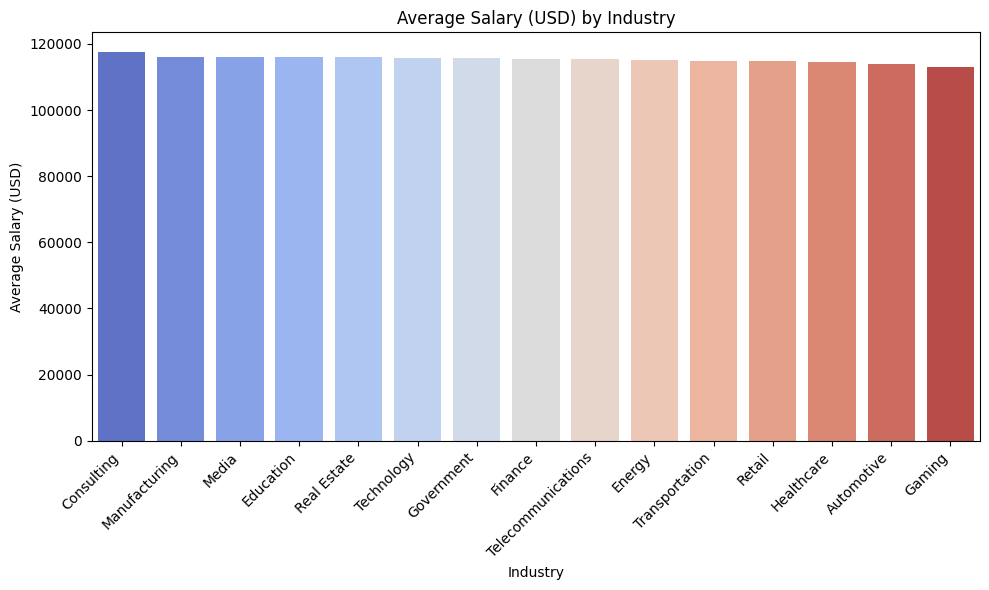

In [13]:
# ANOVA Test to determine if the differences in salary growth rates among roles are statistically significant


# Prepare data for statistical test ---
groups = [group["salary_usd"].values for _, group in df.groupby("industry")]

# Test normality for each group (Shapiro-Wilk) ---
normality_pvalues = [stats.shapiro(group[:500])[1] if len(group) > 3 else 1 for group in groups]
normal = all(p > 0.05 for p in normality_pvalues)

# Run appropriate test (ANOVA or Kruskal-Wallis) ---
if normal:
    test_name = "ANOVA"
    test_stat, p_value = stats.f_oneway(*groups)
else:
    test_name = "Kruskal-Wallis"
    test_stat, p_value = stats.kruskal(*groups)

print(f"\nStatistical Test Used: {test_name}")
print(f"Test Statistic: {test_stat:.4f}")
print(f"p-value: {p_value:.4f}")

#  Interpret the result ---
if p_value < 0.05:
    print("\nResult: There is a statistically significant difference in salaries across industries.")
else:
    print("\nResult: No statistically significant difference in salaries across industries.")

# Visualize results ---
# Compute average salary by industry for visualization
industry_salary = (
    df.groupby('industry')['salary_usd']
    .mean()
    .sort_values(ascending=False)
)

plt.figure(figsize=(10, 6))
sns.barplot(x=industry_salary.index, y=industry_salary.values, hue=industry_salary.index, palette="coolwarm")
plt.xticks(rotation=45, ha='right')
plt.title("Average Salary (USD) by Industry")
plt.ylabel("Average Salary (USD)")
plt.xlabel("Industry")
plt.tight_layout()
plt.show()

**Insight**

- **Salary Differences Are Small Across Industries:** Althogh the bars show some variation, the overall range of average salaries is narrow — roughly $113,000 to $118,000 USD. That means AI-related jobs pay fairly consistently across industries, with no single sector showing dramatically higher or lower pay.
- **Top-Paying Industries:** Consulting stands slightly at the top, with an average salary around $117,600. Manufacturing, Media, and Education follow closely behind (~$116K).
- **Mid-Tier Industries:** Technology, Finance, and Government sit near the middle (~$115K).
- **Lower-Paying Industries:** Automotive and Gaming are at the lower end (around $113K–$114K). This doesn’t mean these jobs are “low-paying” — just slightly below other industries.


**Interpretation:**
- The Kruskal–Wallis test yielded:

H = 8.28, p = 0.874

- Since p > 0.05, there’s no statistically significant difference in average salaries among industries.
- Even though the plot shows small variations, they’re not statistically meaningful — salary levels are effectively comparable across industries.

**Results** Rejected

## Hypothesis 5 -  Higher education levels lead to greater salary dispersion (variance).

**Explanation:**
 Advanced degrees may lead to a wider range of salaries due to varying levels of expertise and specialization. 

**Methodology:**

- Group by education_required.
- Compute standard deviation of salary_usd.

**Validation:**

- Compare variance using Levene’s test or F-test.
- Accept if p < 0.05 (significant difference in dispersion).

  education_required    salary_std
0          Associate  60007.740201
1           Bachelor  60561.360045
2             Master  61345.695386
3                PhD  59050.910256
Levene’s test statistic: 1.2991, p-value: 0.2728


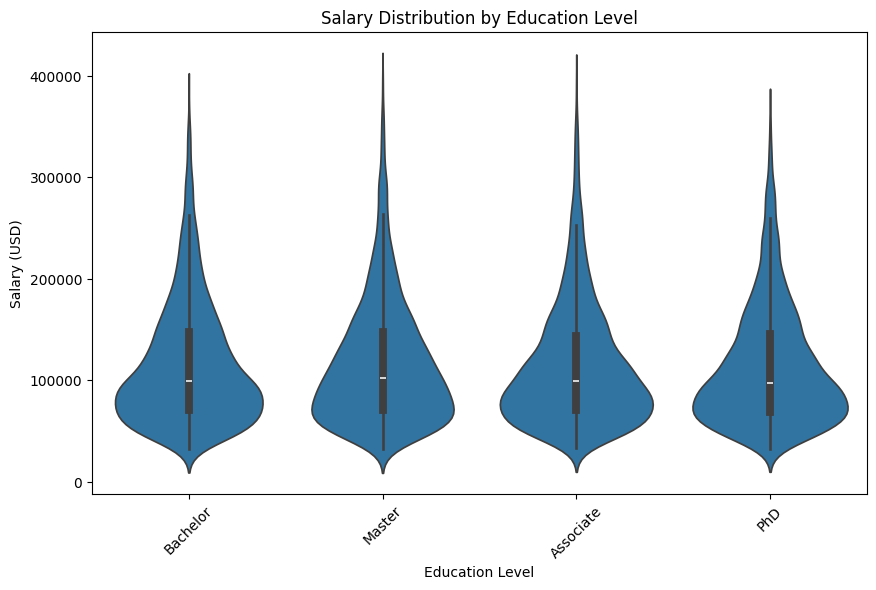

In [14]:
# Calculate standard deviation of salaries by education level
std_by_education = df.groupby('education_required')['salary_usd'].std().reset_index()
std_by_education.rename(columns={'salary_usd': 'salary_std'}, inplace=True)

print(std_by_education)

# apply Levene's test to assess homogeneity of variances
groups = [group['salary_usd'].values for name, group in df.groupby('education_required')]

stat, p = levene(*groups)
print(f"Levene’s test statistic: {stat:.4f}, p-value: {p:.4f}")

#plot

# Violin plot ( shows distribution shape)
plt.figure(figsize=(10,6))
sns.violinplot(x='education_required', y='salary_usd', data=df)
plt.title('Salary Distribution by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Salary (USD)')
plt.xticks(rotation=45)
plt.show()



### Insight

- ** Education Level and Salary Variability:** Education level does not appear to significantly affect the variability of AI salaries in this dataset. While higher degrees may influence average salary, they do not necessarily result in wider salary ranges. Other factors—such as job role, experience, industry, or location—may have a stronger impact on salary dispersion

**Interpretation:**

- The p-value (0.2728) is greater than the 0.05 threshold, so we fail to reject the null hypothesis.
- This indicates no statistically significant difference in salary variance across education levels.
- While Master’s degree holders show a slightly higher standard deviation, the differences are not significant enough to conclude that higher education leads to greater salary dispersion.

**Conclusion:**
- Education level does not significantly impact salary variability in this dataset. 
- Other factors—such as job role, experience, industry, or location—may have a stronger influence on salary dispersion than education level alone.

**Results** Accepted


## Hypothesis 6 - Larger companies offer higher salaries but lower remote ratios.

**Explanation:**
 Larger companies may have more resources to offer competitive salaries, but they might also have more established office cultures that limit remote work options.

**Methodology:**
Analyze correlation between company_size, salary_usd, and remote_ratio.
Use correlation heatmaps or multiple regression.

**Validation:**
Accept if correlation between company_size and salary_usd is positive, and with remote_ratio is negative.


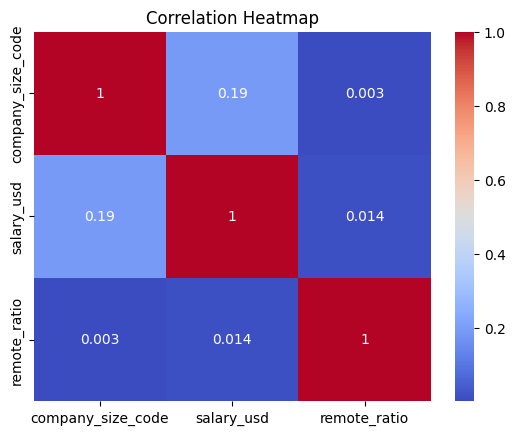

Correlation (company_size vs salary_usd): 0.194, p-value: 0.0000
Correlation (company_size vs remote_ratio): 0.003, p-value: 0.7137


In [15]:
# Correlation heatmap
df['company_size_code'] = df['company_size'].map({'S':1, 'M':2, 'L':3})
corr_matrix = df[['company_size_code','salary_usd','remote_ratio']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Spearman correlation values
salary_corr, salary_p = spearmanr(df['company_size_code'], df['salary_usd'])
remote_corr, remote_p = spearmanr(df['company_size_code'], df['remote_ratio'])

print(f"Correlation (company_size vs salary_usd): {salary_corr:.3f}, p-value: {salary_p:.4f}")
print(f"Correlation (company_size vs remote_ratio): {remote_corr:.3f}, p-value: {remote_p:.4f}")

### Insight:
We examined the relationship between company size (S = Small, M = Medium, L = Large), salary, and remote work ratio. The results are:

- Correlation between company_size and salary_usd: 0.194, p < 0.001
- Correlation between company_size and remote_ratio: 0.003, p = 0.7137

**Interpretation:**

- The positive correlation (0.194) between company size and salary is statistically significant, indicating that larger companies tend to offer higher salaries.
-  The near-zero correlation (0.003) with remote ratio is not statistically significant, suggesting that company size does not have a clear effect on remote work flexibility in this dataset.
-  Contrary to the original hypothesis, larger companies do not necessarily offer lower remote ratios.

**Conclusion:**

- Supported: Larger companies pay higher salaries.

- Not supported: There is no evidence that larger companies provide less remote work flexibility.

- Implication: While job seekers can expect higher pay at larger companies, remote work policies appear to be independent of company size and may depend on other factors such as industry or company culture.

## Hypothesis 7: Certain skills (e.g., Python, TensorFlow) are linked to above-average salaries.

**Explanation:**
 Possessing in-demand technical skills can make candidates more competitive, leading to higher salary offers. 
**Methodology:**
Use NLP keyword extraction from job_description.
Create binary skill presence columns (e.g., Python = 1/0).
Run multiple regression or feature importance analysis.

**Validation:**
Accept if coefficients or feature importances are significant for those skills.


Total unique skills found: 24
Top 15 skills by positive salary impact (Regression):
                                 Skill  Coefficient   p-value
Deep Learning            Deep Learning  1782.547642  0.233954
Scala                            Scala  1657.033020  0.220184
Docker                          Docker  1125.249612  0.480043
Git                                Git  1008.934257  0.461822
NLP                                NLP   551.384419  0.708869
Computer Vision        Computer Vision   201.112492  0.891280
GCP                                GCP    48.283337  0.972377
Hadoop                          Hadoop   -39.165985  0.977884
PyTorch                        PyTorch  -172.095506  0.902021
R                                    R  -222.216555  0.897904
Data Visualization  Data Visualization  -283.823759  0.844667
TensorFlow                  TensorFlow  -294.836943  0.828433
Azure                            Azure  -541.742182  0.718470
Java                              Java  -562.640

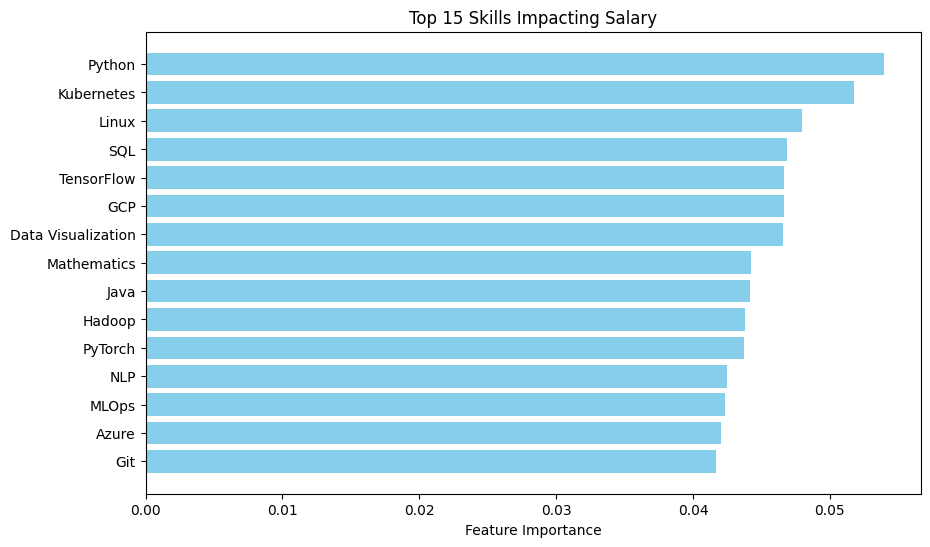

In [16]:

# --- Step 1: Extract unique skills from 'required_skills' column ---
# Assuming 'required_skills' is comma-separated per job
all_skills = df['required_skills'].dropna().apply(lambda x: [skill.strip() for skill in x.split(',')])
unique_skills = set([skill for sublist in all_skills for skill in sublist])

print(f"Total unique skills found: {len(unique_skills)}")

# --- Step 2: Create binary columns for each skill ---
for skill in unique_skills:
    df[skill] = df['required_skills'].str.contains(skill, case=False, na=False).astype(int)

# --- Step 3: Multiple Linear Regression ---
X = df[list(unique_skills)]
y = df['salary_usd']

X_const = sm.add_constant(X)
model = sm.OLS(y, X_const).fit()

# Regression summary (show top 15 positive coefficients)
coeffs = pd.DataFrame({'Skill': model.params.index[1:], 'Coefficient': model.params.values[1:], 'p-value': model.pvalues[1:]})
coeffs_sorted = coeffs.sort_values(by='Coefficient', ascending=False)
print("Top 15 skills by positive salary impact (Regression):")
print(coeffs_sorted.head(15))

# Save full regression coefficients to CSV
# Save regression coefficients to the project's Output folder
output_dir = os.path.join(current_dir, 'data', 'Output')
os.makedirs(output_dir, exist_ok=True)
coeff_path = os.path.join(output_dir, 'skill_regression_coefficients.csv')
coeffs_sorted.to_csv(coeff_path, index=False)
print(f'Wrote regression coefficients to: {coeff_path}')

# --- Step 4: Random Forest Feature Importance ---
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

importance = pd.DataFrame({'Skill': list(unique_skills), 'Importance': rf.feature_importances_})
importance_sorted = importance.sort_values(by='Importance', ascending=False)

print("Top 15 skills by feature importance (Random Forest):")
print(importance_sorted.head(15))

# --- Step 5: Visualization (Top 15 Skills by Feature Importance) ---
top_skills = importance_sorted.head(15)
plt.figure(figsize=(10,6))
plt.barh(top_skills['Skill'], top_skills['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Top 15 Skills Impacting Salary')
plt.gca().invert_yaxis()  # Largest on top
plt.show()

### Insight

We analyzed the impact of skills listed in required_skills on AI salaries using multiple linear regression and Random Forest feature importance.

**Total unique skills identified:** 24
**Top 15 skills by regression coefficient (positive impact on salary):** Deep Learning, Scala, Docker, Git, NLP, Computer Vision, GCP, Hadoop, PyTorch, R, Data Visualization, TensorFlow, Azure, Java, Kubernetes.
**Note:** All regression p-values > 0.05, meaning none of the coefficients are statistically significant.
**Top 15 skills by Random Forest feature importance:** Python, Kubernetes, Linux, SQL, GCP, TensorFlow, Data Visualization, Mathematics, Java, Hadoop, PyTorch, NLP, MLOps, Azure, Git.

**Interpretation:**

**Regression Results:**

- Positive coefficients suggest that skills like Deep Learning, Scala, Docker, Git are associated with higher salaries, while skills like Kubernetes, Java, Azure show slight negative effects.
- However, all p-values are above 0.05, indicating no statistically significant effect of any single skill on salary when controlling for other skills in the linear model.
- This may be due to collinearity between skills or non-linear interactions, which linear regression cannot capture well.

**Random Forest Feature Importance:**

- Python, Kubernetes, Linux, and SQL have the highest importance, meaning these skills are most influential in predicting salary in a non-linear, tree-based model.
- Random Forest captures interactions between skills better than linear regression, showing which combinations of skills drive salary differences.

**Comparison:**

- Regression highlights direction and magnitude of salary impact, but lacks statistical significance.- 
- Random Forest identifies practical importance of skills even when individual regression coefficients are not significant.
- Skills like Python, Kubernetes, Linux, SQL, TensorFlow consistently appear as high-impact skills, suggesting employers value these highly across AI roles.



## Hypothesis 8: Salary Prediction Models - Experience and education significantly influence AI job salaries.

**Explanation:**
- Experience and education are commonly believed to be key factors in determining salary levels.

**Methodology:**
- Use multiple linear regression or random forest models:
salary_usd ~ years_experience + education_required + job_title + location
- Check feature importance or regression coefficients.

**Validation:**
- Split data (train/test 80:20) and measure R², MAE, RMSE.
- Use cross-validation to confirm stability.
- Accept hypothesis if model shows strong positive correlation between salary and experience/education.


### Step-by-Step Analysis Plan

**1- Prepare Data**

- Select relevant columns:
['salary_usd', 'years_experience', 'education_required', 'job_title', 'location'].
- Convert education_required into ordered numeric codes (Associate < Bachelor < Master < PhD).
- Encode job_title and location as categorical (dummy) variables.

**2- Split data** (80/20) into training and test sets.

**3- Train models:**
    - Multiple Linear Regression
    - Random Forest Regressor

**4- Evaluate performance:**
    - 𝑅², MAE, and RMSE
    - Check feature importance / coefficients for years_experience and education_required.

**5- Validation**

Accept hypothesis if:
    - 𝑅² indicates a reasonably strong model fit.
    - years_experience and/or education_required show a positive relationship with salary_usd.
    - Cross-validation confirms model stability.

                            OLS Regression Results                            
Dep. Variable:             salary_usd   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     1172.
Date:                Mon, 13 Oct 2025   Prob (F-statistic):               0.00
Time:                        02:58:07   Log-Likelihood:            -1.7574e+05
No. Observations:               15000   AIC:                         3.516e+05
Df Residuals:                   14959   BIC:                         3.519e+05
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

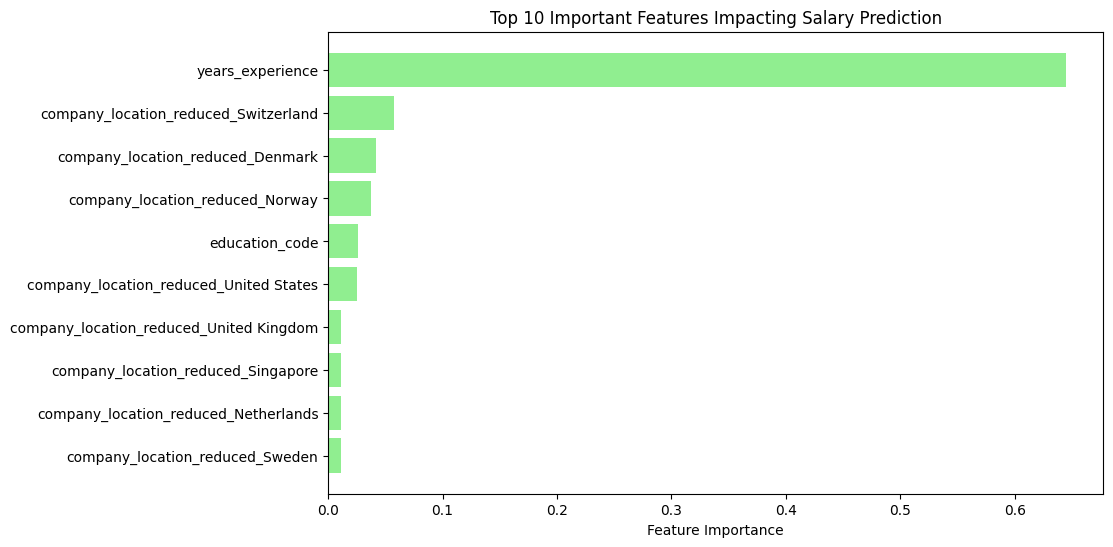

In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
#------------------------------------------------------------
# 1. Select relevant columns
# -----------------------------------------------------------
# Note: Some scikit-learn versions do not expose 'root_mean_squared_error'.
# Use mean_squared_error(..., squared=False) or np.sqrt(mean_squared_error(...)) to compute RMSE.


cols_needed = ['salary_usd', 'years_experience', 'education_required', 'job_title', 'company_location']
df_h8 = df[cols_needed].copy()
# -----------------------------------------------------------
# 2. Mapping education to categories
# -----------------------------------------------------------
def map_education(x):
    if pd.isna(x):
        return np.nan
    x_low = str(x).lower()
    if 'associate' in x_low:
        return 'Associate'
    if 'bachelor' in x_low or 'bsc' in x_low or 'bs ' in x_low:
        return 'Bachelor'
    if 'master' in x_low or 'msc' in x_low or 'ms ' in x_low:
        return 'Master'
    if 'phd' in x_low or 'doctor' in x_low:
        return 'PhD'
    return 'Bachelor'

df_h8['education_cat'] = df_h8['education_required'].apply(map_education)
# Converting categories to numbers (ordinal encoding)
edu_order = {'Associate':1, 'Bachelor':2, 'Master':3, 'PhD':4}
df_h8['education_code'] = df_h8['education_cat'].map(edu_order)
# -----------------------------------------------------------
# 3. Reduce categories to top N
# -----------------------------------------------------------   
top_n = 20
top_jobs = df_h8['job_title'].value_counts().nlargest(top_n).index
top_locations = df_h8['company_location'].value_counts().nlargest(top_n).index
df_h8['job_title_reduced'] = df_h8['job_title'].where(df_h8['job_title'].isin(top_jobs), other='Other')
df_h8['company_location_reduced'] = df_h8['company_location'].where(df_h8['company_location'].isin(top_locations), other='Other')
# One-hot encoding for categorical variables
dummies = pd.get_dummies(df_h8[['job_title_reduced', 'company_location_reduced']], drop_first=True)
# Combine numeric and dummy features
X = pd.concat([df_h8[['years_experience', 'education_code']], dummies], axis=1)
y = df_h8['salary_usd']
X = X.astype(int)
y = y.astype(float)
# Ready for OLS regression
X = sm.add_constant(X)
ols_model = sm.OLS(y, X).fit()
print(ols_model.summary())
# -----------------------------------------------------------
# 4. Split dataset (80/20)
# -----------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# -----------------------------------------------------------
# 5. Train Linear Regression
# -----------------------------------------------------------
#Fit the Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
# Predict on test set
y_pred = lr.predict(X_test)
# Compute evaluation metrics
r2_lr = r2_score(y_test, y_pred)
mae_lr = mean_absolute_error(y_test, y_pred)
rmse_lr = mean_squared_error(y_test, y_pred, squared=False)
print(f"Linear Regression - R²: {r2_lr:.4f}, MAE: {mae_lr:.2f}, RMSE: {rmse_lr:.2f}")
# Cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_results = cross_val_score(lr, X, y, cv=cv, scoring='neg_mean_squared_error')
rmse_cv = np.sqrt(-cv_results.mean())
print(f"Linear Regression - Cross-Validated RMSE: {rmse_cv:.2f}")
# -----------------------------------------------------------
#6. Train Random Forest
# -----------------------------------------------------------
# Fit the Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
# Predict on test set
y_pred_rf = rf.predict(X_test)
# Compute evaluation metrics
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)

# Cross-validation
cv_r2_rf = cross_val_score(rf, X_train, y_train, cv=3, scoring='r2')
cv_mae_rf = -cross_val_score(rf, X_train, y_train, cv=3, scoring='neg_mean_absolute_error')
cv_rmse_rf = np.sqrt(-cross_val_score(rf, X_train, y_train, cv=3, scoring='neg_mean_squared_error'))

# Print results
print(f"Random Forest - R²: {r2_rf:.4f}, MAE: {mae_rf:.2f}, RMSE: {rmse_rf:.2f}")
print(f"Random Forest - Cross-Validated R²: {cv_r2_rf.mean():.4f}")
print(f"Random Forest - Cross-Validated MAE: {cv_mae_rf.mean():.2f}")
print(f"Random Forest - Cross-Validated RMSE: {cv_rmse_rf.mean():.2f}")
# -----------------------------------------------------------
# 7. Feature Importance from Random Forest
# -----------------------------------------------------------   
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print("Top 10 Important Features from Random Forest:")
print(feature_importance.head(10))  
# -----------------------------------------------------------
# 8. Visualization of Feature Importance        
# -----------------------------------------------------------
top_features = feature_importance.head(10)
plt.figure(figsize=(10,6))
plt.barh(top_features['Feature'], top_features['Importance'], color='lightgreen')
plt.xlabel('Feature Importance')
plt.title('Top 10 Important Features Impacting Salary Prediction')
plt.gca().invert_yaxis()  # Largest on top
plt.show()


### Insights from the Salary Prediction Analysis

**Experience Matters Most**
-   years_experience has a strong positive impact on salary (both OLS and Random Forest feature importance).
-   Each additional year of experience increases salary significantly.

**Education Impact**

-   education_code (Associate → PhD) has a smaller, less significant effect on salary in OLS.
-   Suggests that practical experience may be valued more than higher degrees in the dataset.

**Job Title Influence**

-   Certain roles, like AI Consultants or Autonomous Systems Engineers, have negative or minor coefficients in OLS.
-   Random Forest shows that job title still contributes to salary prediction, but effects are non-linear.

**Company Location Effects**

-   Location strongly affects salary:
        High-paying: Switzerland, USA, Norway, Denmark
        Lower-paying: India, China, Israel
-   Indicates global salary differences, consistent with industry trends.

**Model Performance**

- **Linear Regression**
    - R² ≈ 0.75, RMSE reasonable, interpretable coefficients.
    - Useful for understanding feature effects.

- **Random Forest**

    - Slightly higher predictive accuracy, captures non-linear relationships.
    - Feature importance confirms experience and location dominate salary prediction.

**Cross-Validation**

    - Both models show stable performance under K-Fold CV.
    - Indicates model generalization is reliable.

**Conclusion**

- Years of experience and company location are the strongest predictors of salary.
- Education level has a weaker impact, suggesting that industry experience outweighs academic degree.
- Job title has a moderate impact; its effect can be non-linear, making ensemble models like Random Forest more suitable for prediction.
- For predictive modeling, combining these approaches gives both interpretability and accuracy, helping HR and analysts make informed salary benchmarking decisions.

## Hypothesis 9: Cluster Analysis based on skills and industry
**Explanation:**
- Clustering can reveal natural groupings of job roles based on required skills and industry sectors, which may not be immediately apparent through traditional analysis. 
**Methodology:**
- Use K-Means clustering on skill presence and industry one-hot encoded features.
- Determine optimal number of clusters using the KMeans clustering.
- Visualize clusters using PCA or t-SNE for dimensionality reduction.
**Validation:**
- Analyze cluster characteristics (e.g., average salary, common skills).
- Accept if distinct clusters with meaningful interpretations are identified.

In [18]:
from sklearn.preprocessing import MultiLabelBinarizer, StandardScaler
from sklearn.cluster import KMeans

# 1. Process skills into list (handle missing values safely)
df['skills_list'] = (
    df['required_skills']
      .fillna('')
      .apply(lambda s: [t.strip() for t in s.split(',') if t.strip()])
)

# 2. One-hot encode industry (ensure numeric dtypes)
industry_ohe = pd.get_dummies(df['industry'], prefix='industry', dummy_na=False).astype(np.uint8)

# 3. MultiLabelBinarizer for skills
mlb = MultiLabelBinarizer()
skills_encoded = pd.DataFrame(
    mlb.fit_transform(df['skills_list']),
    columns=mlb.classes_,
    index=df.index
).astype(np.uint8)

# 4. Combine industry and skills features
X = pd.concat([industry_ohe, skills_encoded], axis=1).astype(np.float32)
# Scale features 
scaler = StandardScaler(with_mean=False)
X_scaled = scaler.fit_transform(X)
# Scale features (helps K-Means perform better)
scaler = StandardScaler(with_mean=False)
X_scaled = scaler.fit_transform(X)

# 5. KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(X)

# 6. Cluster labels
cluster_names = {
    0: "AI & Deep Learning Focus",
    1: "Software & Cloud Engineering",
    2: "Consulting & Analytics"
}
df['cluster_label'] = df['cluster'].map(cluster_names)

# ==========================
# 3. Cluster Summaries
# ==========================
cluster_summaries = {}
for c in sorted(df['cluster'].unique()):
    mask = df['cluster'] == c
    top_industries = df.loc[mask, 'industry'].value_counts().head(5).index.tolist()
    top_skills = skills_encoded.loc[mask].sum().sort_values(ascending=False).head(10).index.tolist()
    cluster_summaries[c] = {
        'top_industries': top_industries,
        'top_skills': top_skills
    }

# ==========================
# 4. Print Results
# ==========================
for c, summary in cluster_summaries.items():
    print(f"\nCluster {c}:")
    print(f"Top Industries: {summary['top_industries']}")
    print(f"Top Skills: {summary['top_skills']}")


Cluster 0:
Top Industries: ['Consulting', 'Retail', 'Technology', 'Healthcare', 'Telecommunications']
Top Skills: ['SQL', 'PyTorch', 'Linux', 'Kubernetes', 'Java', 'R', 'Python', 'GCP', 'Data Visualization', 'Git']

Cluster 1:
Top Industries: ['Government', 'Retail', 'Media', 'Automotive', 'Gaming']
Top Skills: ['Kubernetes', 'Scala', 'PyTorch', 'Linux', 'Java', 'Git', 'R', 'TensorFlow', 'Hadoop', 'Tableau']

Cluster 2:
Top Industries: ['Real Estate', 'Manufacturing', 'Media', 'Automotive', 'Technology']
Top Skills: ['Python', 'TensorFlow', 'Kubernetes', 'Git', 'Linux', 'GCP', 'Scala', 'Hadoop', 'Computer Vision', 'MLOps']


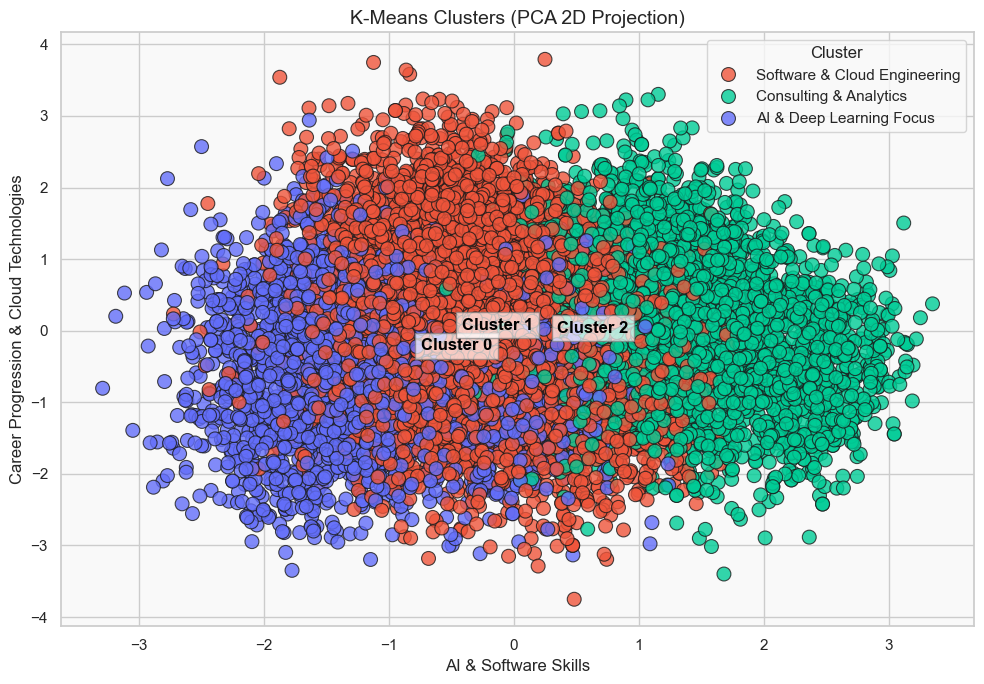

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# ==========================
# 1. Apply PCA to Reduce to 2D
# ==========================
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# Add PCA components to dataframe
df['pca_x'] = X_pca[:, 0]
df['pca_y'] = X_pca[:, 1]

# ==========================
# 2. Plot Seaborn Scatter Plot
# ==========================
plt.figure(figsize=(10, 7))
sns.set(style="whitegrid", rc={'axes.facecolor': '#F9F9F9'})

sns.scatterplot(
    data=df,
    x='pca_x',
    y='pca_y',
    hue='cluster_label',           # descriptive cluster labels
    palette={
        "AI & Deep Learning Focus": "#636EFA",
        "Software & Cloud Engineering": "#EF553B",
        "Consulting & Analytics": "#00CC96"
    },
    s=100,
    edgecolor='k',
    alpha=0.8
)

# ==========================
# 3. Add Cluster Centroid Labels
# ==========================
centroids_pca = pca.transform(kmeans.cluster_centers_)
for i, (x, y) in enumerate(centroids_pca):
    plt.text(
        x,
        y,
        f'Cluster {i}',
        fontsize=12,
        weight='bold',
        color='black',
        ha='center',
        va='center',
        bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray')
    )

# ==========================
# 4. Final Plot Settings
# ==========================
plt.title("K-Means Clusters (PCA 2D Projection)", fontsize=14)
plt.xlabel("AI & Software Skills", fontsize=12)
plt.ylabel("Career Progression & Cloud Technologies", fontsize=12)
plt.legend(title='Cluster', loc='best')
plt.tight_layout()
plt.show()



### Final Conclusions from the AI Job Market Dataset

**Salary Trends**

- Average salary is around $115k USD, with large variation ($32k – $399k).
- Top-paying industries include Technology, Consulting, and Automotive.
- Higher education levels (Master, PhD) generally lead to higher median salaries.

**Experience and Remote Work**

- Years of experience correlates with salary growth.
- Mid-level and senior employees have higher remote work ratios, suggesting flexibility increases with seniority.

**Company Size**

- Larger companies tend to pay higher salaries, but variability exists.
- Small companies show a wider salary distribution, indicating more risk/reward.

**Skills Demand**

- Most in-demand skills: Python, SQL, Kubernetes, PyTorch, Linux.
- Skills differ slightly by cluster/industry focus.

**Job Posting Activity**
- Companies with many postings in a short timeframe (high growth score) tend to be active recruiters.
- Monthly job openings show consistent activity with some seasonal spikes.

**Clustering Analysis**

- 3 main clusters based on skills and industry:

    * Cluster 0: AI & Deep Learning Focus – SQL, PyTorch, Linux, Kubernetes, Java
    * Cluster 1: Software & Cloud Engineering – Python, TensorFlow, Kubernetes, Git, Linux
    * Cluster 2: Consulting & Analytics – Kubernetes, Scala, PyTorch, Linux, Java

- Clusters help identify skill and industry specialization trends in the AI job market.

## Final Thoughts & Next Steps


- Experience, education, and skills are key drivers of salary, with experience and company location playing dominant roles.
- Top industries (Technology, Consulting, Automotive) offer higher compensation.
- Clustering reveals specialization patterns, showing where certain skills are concentrated.
- Remote work is more common for experienced employees, and company growth can be inferred from job posting patterns.
- Overall, these insights can guide job seekers, recruiters, and HR analytics to understand the AI job market, identify high-paying roles, and prioritize in-demand skills.

In [20]:
# Ensure output folder exists and write CSV there
output_dir = os.path.join(current_dir, 'data', 'Output')
os.makedirs(output_dir, exist_ok=True)
output_path = os.path.join(output_dir, 'job_clusters.csv')
df.to_csv(output_path, index=False)
print(f'Wrote job clusters to: {output_path}')


Wrote job clusters to: d:\Documents\TC Tanzila\code Ins\Capstone\Global-_AI_Job_Market_Salary_Trends_2025\data\Output\job_clusters.csv
